In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/home/ensai/imatag/website_categorization_custom/categorization/Datasets/Feature_dataset_2023-02-01_clean_full.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
df.head()

,url,main_category,main_category_confidence,tld,tokens
0,http://0calc.com,Science,0.5606,com,"['web', 'scientif', 'calcul', 'regist', 'login..."
1,http://100diet.net,Health,0.5991,net,"['diet', 'net', 'diet', 'net', 'javascript', '..."
2,http://1091.co.jp,Sports,0.5912,jp,"['w', 'h', 'x', 'co', 'jp', 'h', 'iupdat', 'e'..."
3,http://10bet.com,Gambling,0.7795,com,"['bet', 'bet', 'onlin', 'sport', 'bet', 'welco..."
4,http://1100ad.com,Books_and_Literature,1.0000,com,"['ad', 'domin', 'awesom', 'strategi', 'authent..."


In [6]:
df.main_category.value_counts()

Food_and_Drink              894
Health                      839
Books_and_Literature        731
Reference                   699
Beauty_and_Fitness          692
Sports                      600
Law_and_Government          596
Autos_and_Vehicles          578
People_and_Society          521
Gambling                    463
Computer_and_Electronics    439
Finance                     413
Science                     405
Internet_and_Telecom        403
Business_and_Industry       350
News_and_Media              309
Career_and_Education        296
Games                       281
Travel                      280
Arts_and_Entertainment      234
Shopping                    220
Recreation_and_Hobbies      180
Pets_and_Animals            164
Adult                        74
Home_and_Garden              57
Name: main_category, dtype: int64

In [7]:
import ast

def convert_to_list(row):
    return ast.literal_eval(row['tokens'])

In [8]:
df['tokens'] = df.apply(convert_to_list, axis = 1)

In [9]:
data = []
for index,row in df.iterrows():
    data.append({"class":row["main_category"], "tokens":row["tokens"]})

words = []
classes = []
documents = []

In [12]:
data_tokens = [' '.join(data[i]['tokens']) for i in range(len(data))]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=10000)
X = matrix.fit_transform(data_tokens).toarray()

In [14]:
y = [data[i]['class'] for i in range(len(data))]

In [26]:
count = pd.Series(y).value_counts()

In [27]:
count

Food_and_Drink              894
Health                      839
Books_and_Literature        731
Reference                   699
Beauty_and_Fitness          692
Sports                      600
Law_and_Government          596
Autos_and_Vehicles          578
People_and_Society          521
Gambling                    463
Computer_and_Electronics    439
Finance                     413
Science                     405
Internet_and_Telecom        403
Business_and_Industry       350
News_and_Media              309
Career_and_Education        296
Games                       281
Travel                      280
Arts_and_Entertainment      234
Shopping                    220
Recreation_and_Hobbies      180
Pets_and_Animals            164
Adult                        74
Home_and_Garden              57
dtype: int64

: 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [17]:
accuracy

0.31977611940298506

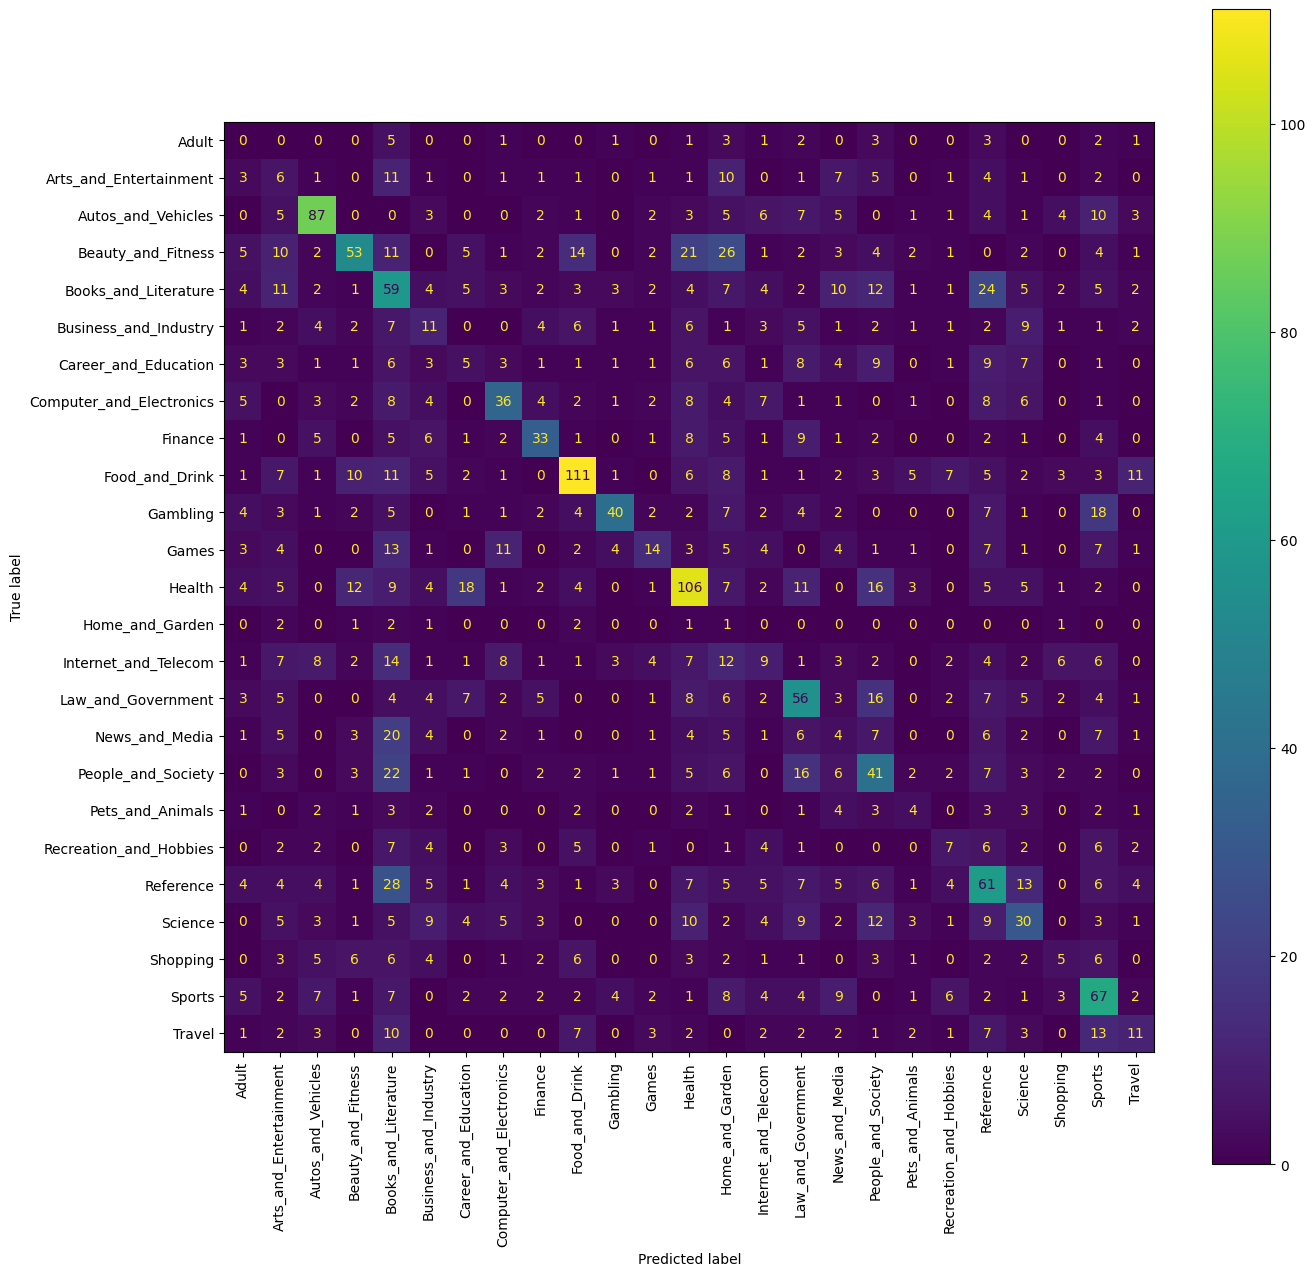

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,xticks_rotation='vertical')

fig = cm_display.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)  

plt.show() 